In [207]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [208]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


# print("pt = Transverse Momentum")
# print("eta = Pseudo Rapidity")
# print("phi = Azimuthal Angle")
# print("mass = Mass")
# print("ee2 = Energy Correlation Function 2")
# print("ee3 = Energy Correlation Function 3")
# print("d2 = Energy Correlation Function")
# print("angularity = Jet broadness to thrust ratio")
# print("t1 = subjettiness of degree 1")
# print("t2 = subjettiness of degree 2") 
# print("t3 = subjettiness of degree 3")
# print("t21 = ratio of t2/t1")
# print("t32 = ratio of t3/t2")
# print("KtDeltaR = Delta R of two subjets within large-R jet")

Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

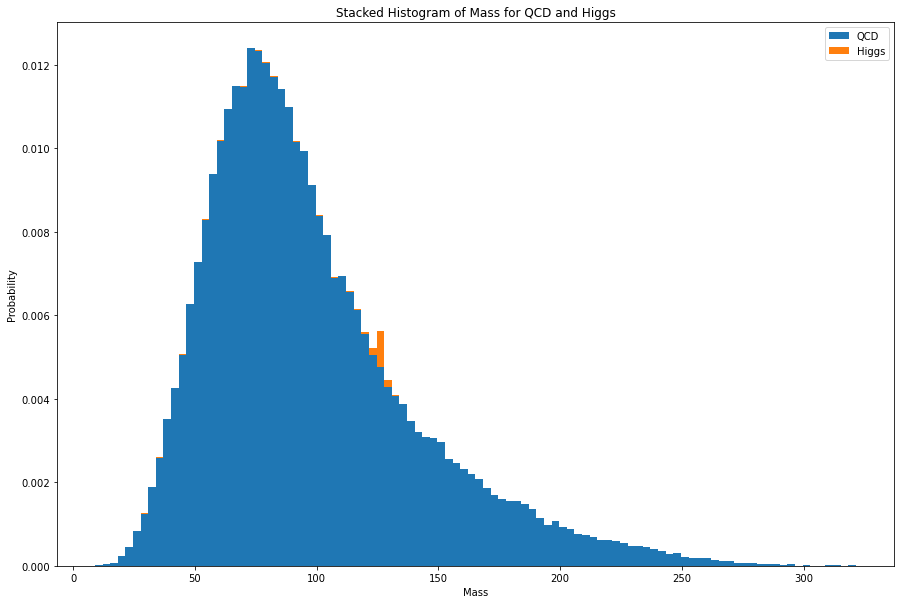

In [209]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])

ax.legend(["QCD", "Higgs"])
ax.set_title("Stacked Histogram of Mass for QCD and Higgs")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

In [235]:
n_higgs = 100
n_qcd = 20000

exp_prob = stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0)
exp_sig = stats.norm.ppf(prob)

approx_sig = n_higgs / np.sqrt(n_qcd)

print("The expected significance of the Higgs Boson is " + str(exp_sig) + ". The approximation is " + str(approx_sig) + ".")

The expected significance of the Higgs Boson is 0.7112259282313185. The approximation is 0.7071067811865475.


# Mass Cuts

In [228]:
bin_size = 33
upper_val = 330

hist_qcd = ax.hist(qcd['mass'], bins = bin_size, density = False, weights = [qcd_weight], range = (0, upper_val))
hist_higgs = ax.hist(higgs['mass'], bins = bin_size, density = False, weights = [higgs_weight], range = (0, upper_val))

cut_sigs = []
for i in range(bin_size):
    n_qcd = hist_qcd[0][i]
    n_higgs = hist_higgs[0][i]
    sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
    cut_sigs.append(sig)
    
index_max = cut_sigs.index(max(cut_sigs))
print("Optimal cut is between " + str(hist_qcd[1][index]) + " and " + str(hist_qcd[1][index] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))

Optimal cut is between 120.0 and 130.0 with an expected significance of 2.4116886489260785


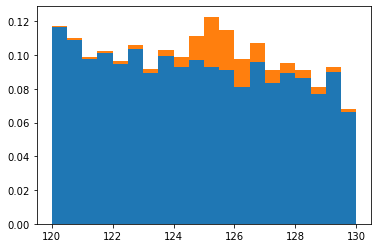

In [233]:
fig, ax = plt.subplots(1, 1)

ax.hist([qcd['mass'], higgs['mass']], bins = 20, density = True, stacked = True, weights = [qcd_weight, higgs_weight], range = (120, 130))
plt.show()

# Other Cuts

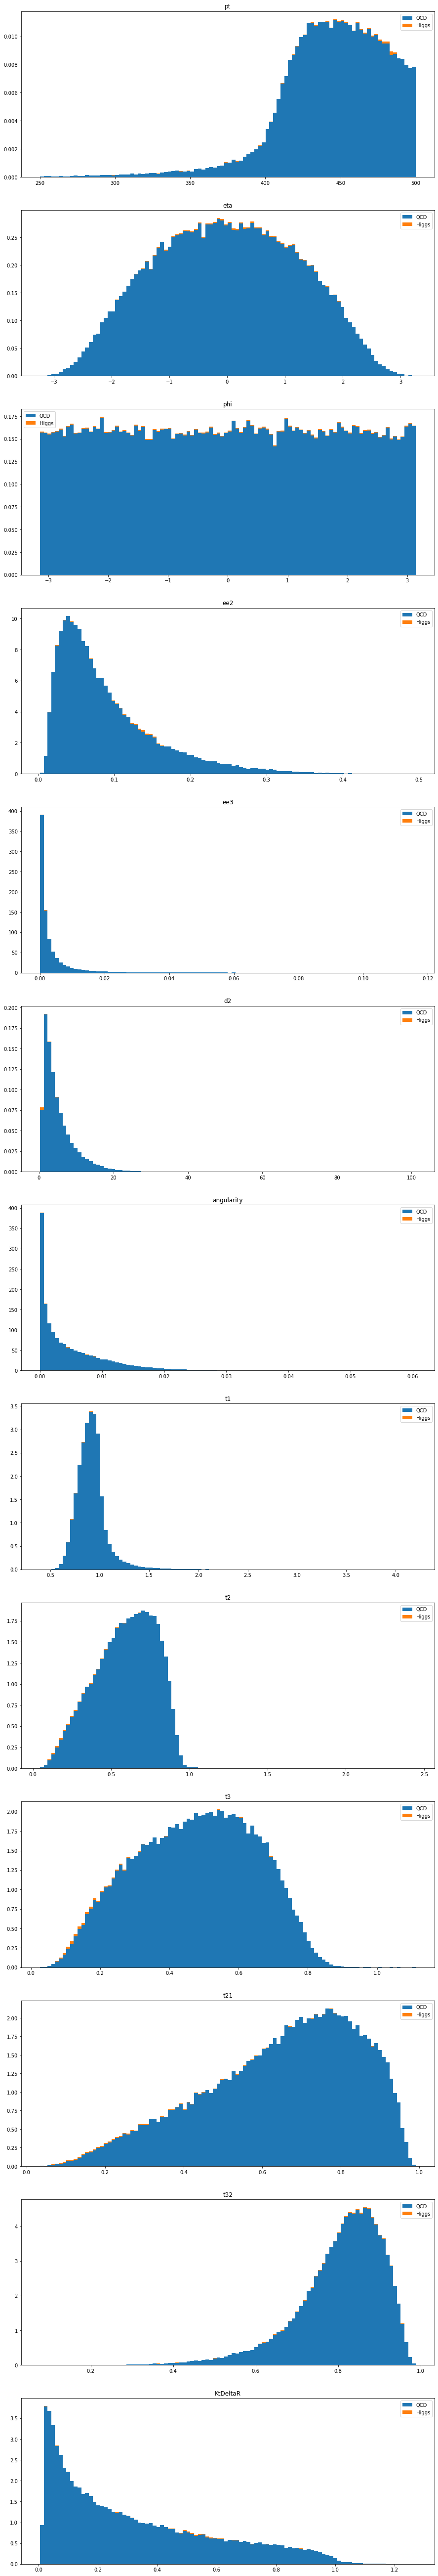

In [247]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(13, 1, figsize = (15, 95))

i = 0
for key in qcd:
    
    if key != 'mass':
        qcd_weight = np.array([n_qcd] * len(qcd[key]))
        higgs_weight = np.array([n_higgs] * len(higgs[key]))

        ax[i].hist([qcd[key], higgs[key]], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])
        ax[i].set_title(key)
        ax[i].legend(["QCD", "Higgs"])
        i = i + 1

plt.show()